In [97]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import collections
import numpy as np

In [33]:
import glob
file_paths = glob.glob('./data/*')
tweet_type_per_file={}
frames = []
for p in file_paths:
    tweets = pd.read_csv(p)
    frames.append(tweets)
big_frame = pd.concat(frames)

/home/glacierpika/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/glacierpika/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/home/glacierpika/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (0,15,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [36]:
big_frame

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,account_type,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1
0,906000000000000000,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,10/1/2017 19:58,10/1/2017 19:59,1052,9636,253,...,Right,0,RightTroll,0,905874659358453760,914580356430536707,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914580356430...,NaN,NaN
1,906000000000000000,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,10/1/2017 22:43,10/1/2017 22:43,1054,9637,254,...,Right,0,RightTroll,0,905874659358453760,914621840496189440,http://twitter.com/905874659358453760/statuses...,https://twitter.com/damienwoody/status/9145685...,NaN,NaN
2,906000000000000000,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,10/1/2017 22:50,10/1/2017 22:51,1054,9637,255,...,Right,1,RightTroll,0,905874659358453760,914623490375979008,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/913231923715...,NaN,NaN
3,906000000000000000,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,10/1/2017 23:52,10/1/2017 23:52,1062,9642,256,...,Right,0,RightTroll,0,905874659358453760,914639143690555392,http://twitter.com/905874659358453760/statuses...,https://twitter.com/10_gop/status/914639143690...,NaN,NaN
4,906000000000000000,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,10/1/2017 2:13,10/1/2017 2:13,1050,9645,246,...,Right,1,RightTroll,0,905874659358453760,914312219952861184,http://twitter.com/905874659358453760/statuses...,https://twitter.com/realDonaldTrump/status/914...,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233535,2260338140,POLITICS_T0DAY,Порошенко призвал к полной перезагрузке правит...,United States,Russian,2/16/2016 22:20,2/16/2016 22:20,92,887,12934,...,Russian,0,NonEnglish,0,2260338140,699720021396869121,http://twitter.com/politics_t0day/statuses/699...,https://twitter.com/politics_t0day/status/6997...,http://www.interfax.ru/world/494930,NaN
233536,2260338140,POLITICS_T0DAY,Турецкая атомная бомба появится в 2023 году. ...,United States,Russian,2/16/2016 22:25,2/16/2016 22:25,92,887,12935,...,Russian,0,NonEnglish,0,2260338140,699721241553432576,http://twitter.com/politics_t0day/statuses/699...,https://twitter.com/politics_t0day/status/6997...,http://svpressa.ru/war21/article/142481/,NaN
233537,2260338140,POLITICS_T0DAY,История одной татуировки. Тату на предплечье:...,United States,Russian,2/16/2016 22:31,2/16/2016 22:31,92,887,12936,...,Russian,0,NonEnglish,0,2260338140,699722743533674496,http://twitter.com/politics_t0day/statuses/699...,https://twitter.com/politics_t0day/status/6997...,http://manzal.livejournal.com/359548.html,NaN
233538,2260338140,POLITICS_T0DAY,"Индонезия, Китай, золото и isis #Эксклюзив@pol...",United States,Russian,2/16/2016 22:35,2/16/2016 22:35,92,887,12937,...,Russian,0,NonEnglish,0,2260338140,699723798849916928,http://twitter.com/politics_t0day/statuses/699...,https://twitter.com/politics_t0day/status/6997...,NaN,NaN


In [22]:
tweets = pd.read_csv('./data/IRAhandle_tweets_7.csv')

In [25]:
def parse_tweet_type(tweets):
    tweet_type_response=[0] * len(tweets)
    tweet_type_new_content=[0] * len(tweets)
    for i in range(len(tweets)):
        c = tweets.loc[i, 'content']
        if isinstance(c, str):
            if c.find("@") <= 1:
                tweet_type_response[i] = 1
            else:
                tweet_type_new_content[i] = 1
    tweets['tweet_type_response'] = tweet_type_response
    tweets['tweet_type_new_content'] = tweet_type_new_content

In [26]:
parse_tweet_type(tweets)

In [55]:
print(tweets[tweets['retweet']==1][['article_url']])

                                              article_url
1035    http://twitter.com/NovostiKrsnrsk/statuses/660...
1036    http://twitter.com/NovostiKrsnrsk/statuses/660...
1060    http://twitter.com/NovostiKrsnrsk/statuses/664...
1063    http://twitter.com/NovostiKrsnrsk/statuses/664...
1068    http://twitter.com/NovostiKrsnrsk/statuses/664...
...                                                   ...
228951  http://twitter.com/politics_t0day/statuses/651...
230284  http://twitter.com/politics_t0day/statuses/669...
230926  http://twitter.com/2260338140/statuses/7963227...
231004  http://twitter.com/2260338140/statuses/8043133...
231507  http://twitter.com/2260338140/statuses/8097662...

[65483 rows x 1 columns]


In [31]:
c=tweets[['tweet_type_response','tweet_type_new_content', 'retweet','publish_date']]

In [39]:
c.index = pd.to_datetime(c["publish_date"])

In [42]:
c = c.drop(columns=["publish_date"])

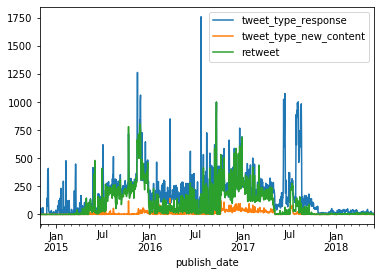

In [50]:
c.resample('D').sum().plot()

In [71]:
def word_freq(tweets):
    content_loc= tweets.columns.get_loc("content")
    words = []
    for i in range(len(tweets)):
        c = tweets.iloc[i, content_loc]
        if isinstance(c, str):
            words.append(c.lower().split(" "))
    words = list(itertools.chain(*words))
    counts= collections.Counter(words)
    return counts

In [72]:
counter = word_freq(tweets[(tweets['retweet']==0)&(tweets['language']=='English')])

In [74]:
counter.most_common(300)

[('in', 23085),
 ('to', 21608),
 ('', 21558),
 ('the', 15447),
 ('of', 13573),
 ('for', 12491),
 ('a', 9562),
 ('on', 8014),
 ('and', 6890),
 ('is', 6347),
 ('at', 5893),
 ('police', 5735),
 ('#news', 5614),
 ('#sports', 5387),
 ('with', 5138),
 ('man', 5079),
 ('#politics', 3965),
 ('after', 3958),
 ('trump', 3648),
 ('from', 3438),
 ('you', 3130),
 ('#cleveland', 2878),
 ('are', 2773),
 ('cleveland', 2731),
 ('by', 2715),
 ('new', 2631),
 ('be', 2623),
 ('that', 2491),
 ('phoenix', 2460),
 ('not', 2370),
 ('this', 2228),
 ('as', 2196),
 ('i', 2176),
 ('#business', 2166),
 ('who', 2106),
 ('ohio', 2076),
 ('will', 2021),
 ('it', 1979),
 ('about', 1962),
 ('woman', 1913),
 ('shooting', 1889),
 ('#local', 1881),
 ('#crime', 1831),
 ('\\|', 1826),
 ('was', 1765),
 ('we', 1690),
 ('have', 1685),
 ('what', 1669),
 ('arizona', 1540),
 ('his', 1529),
 ('over', 1498),
 ('more', 1480),
 ('our', 1466),
 ('killed', 1464),
 ('he', 1458),
 ('fire', 1451),
 ('they', 1440),
 ('state', 1426),
 ('has'

In [90]:
tweets['datetime'] = pd.to_datetime(tweets["publish_date"])

In [102]:
tweets

,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,...,retweet,account_category,new_june_2018,alt_external_id,tweet_id,article_url,tco1_step1,tco2_step1,tco3_step1,datetime
0,3771665775,NOVOSTIKRSNDR,Рейтинговое агентство Moody's улучшило прогноз...,Unknown,Ukrainian,2/26/2017 15:12,2/26/2017 15:12,284,3861,5586,...,0,NonEnglish,1,3771665775,835870062510645248,http://twitter.com/3771665775/statuses/8358700...,https://twitter.com/NovostiKrsndr/status/83587...,http://dlvr.it/NThR1P,NaN,2017-02-26 15:12:00
1,3771665775,NOVOSTIKRSNDR,В Сочи водитель автомобиль сбил велосипедиста ...,Unknown,Russian,2/26/2017 16:50,3/4/2017 2:29,284,3865,6058,...,0,NonEnglish,1,3771665775,835894718659690500,http://twitter.com/3771665775/statuses/8358947...,https://twitter.com/NovostiKrsndr/status/83589...,http://dlvr.it/NTk4wc,NaN,2017-02-26 16:50:00
2,3771665775,NOVOSTIKRSNDR,Nokia представила новую версию 3310 https://t....,Unknown,Serbian,2/26/2017 18:30,2/26/2017 18:30,284,3861,5589,...,0,NonEnglish,1,3771665775,835919873238675457,http://twitter.com/3771665775/statuses/8359198...,https://twitter.com/NovostiKrsndr/status/83591...,http://dlvr.it/NTllJB,NaN,2017-02-26 18:30:00
3,3771665775,NOVOSTIKRSNDR,WADA объяснило заявление о недостатке доказате...,Unknown,Russian,2/26/2017 5:45,2/26/2017 5:45,284,3861,5566,...,0,NonEnglish,1,3771665775,835727364600410113,http://twitter.com/3771665775/statuses/8357273...,https://twitter.com/NovostiKrsndr/status/83572...,http://dlvr.it/NTX3Pr,NaN,2017-02-26 05:45:00
4,3771665775,NOVOSTIKRSNDR,Снова скандал: обманутые пайщики ЖСК «Есенина ...,Unknown,Uzbek,2/27/2017 10:06,2/27/2017 10:06,284,3862,5651,...,0,NonEnglish,1,3771665775,836155445249134592,http://twitter.com/3771665775/statuses/8361554...,https://twitter.com/NovostiKrsndr/status/83615...,http://dlvr.it/NV2GqY,NaN,2017-02-27 10:06:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
233535,2260338140,POLITICS_T0DAY,Порошенко призвал к полной перезагрузке правит...,United States,Russian,2/16/2016 22:20,2/16/2016 22:20,92,887,12934,...,0,NonEnglish,0,2260338140,699720021396869121,http://twitter.com/politics_t0day/statuses/699...,https://twitter.com/politics_t0day/status/6997...,http://www.interfax.ru/world/494930,NaN,2016-02-16 22:20:00
233536,2260338140,POLITICS_T0DAY,Турецкая атомная бомба появится в 2023 году. ...,United States,Russian,2/16/2016 22:25,2/16/2016 22:25,92,887,12935,...,0,NonEnglish,0,2260338140,699721241553432576,http://twitter.com/politics_t0day/statuses/699...,https://twitter.com/politics_t0day/status/6997...,http://svpressa.ru/war21/article/142481/,NaN,2016-02-16 22:25:00
233537,2260338140,POLITICS_T0DAY,История одной татуировки. Тату на предплечье:...,United States,Russian,2/16/2016 22:31,2/16/2016 22:31,92,887,12936,...,0,NonEnglish,0,2260338140,699722743533674496,http://twitter.com/politics_t0day/statuses/699...,https://twitter.com/politics_t0day/status/6997...,http://manzal.livejournal.com/359548.html,NaN,2016-02-16 22:31:00
233538,2260338140,POLITICS_T0DAY,"Индонезия, Китай, золото и isis #Эксклюзив@pol...",United States,Russian,2/16/2016 22:35,2/16/2016 22:35,92,887,12937,...,0,NonEnglish,0,2260338140,699723798849916928,http://twitter.com/politics_t0day/statuses/699...,https://twitter.com/politics_t0day/status/6997...,NaN,NaN,2016-02-16 22:35:00


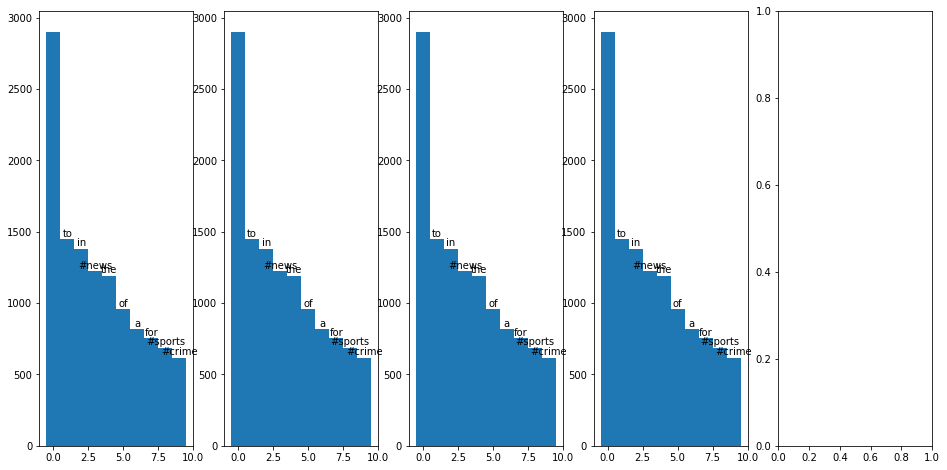

In [119]:
fig, ax = plt.subplots(1,5,figsize=(16, 8))
for year in range(2016,2017):
    for month in range(1,5):
        freqs = word_freq(
            tweets[
                (tweets['datetime']> pd.Timestamp(2016, 1,1)) & 
                (tweets['datetime']< pd.Timestamp(2016, 2,1)) &
                (tweets['language'] == 'English') & 
                (tweets['retweet']==0)
            ]
        ).most_common(10)
        
        labels, values = zip(*freqs)

        indexes = np.arange(len(labels))
        width = 1

        ax[month-1].bar(indexes, values, width)
        rects = ax[month-1].patches


        for rect, label in zip(rects, labels):
            height = rect.get_height()
            ax[month-1].text(rect.get_x() + rect.get_width() / 2, height + 5, label,
            ha='center', va='bottom')
        #ax[month-1].set_xt
        #ax[1].annotate("yimeng", xy=(0,300))